<a href="https://colab.research.google.com/github/tiwary0411/MLProjects/blob/main/Supervised%2BLearning%2BProject_Abhishek%2BTiwary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Project
Name: Abhishek Tiwary


In [ ]:
#Import important libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import plotly
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
data_n = pd.read_csv('Part1 - Normal.csv')
data_h = pd.read_csv('Part1 - Type_H.csv')
data_s = pd.read_csv('Part1 - Type_S.csv')

In [ ]:
print(data_n.shape)
print(data_h.shape)
print(data_s.shape)

(100, 7)
(60, 7)
(150, 7)


In [ ]:
data_n.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [ ]:
data_h.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [ ]:
data_s.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

In [ ]:
data_n['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [ ]:
data_h['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [ ]:
data_s['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

The three dataset (Normal/Type_H/Type_S) has slightly different entries for same class. This needs to be standardized to reduce the numbers of pseudo class.

In [ ]:
data_n['Class'] = 'Normal'
print(data_n['Class'].value_counts())

Normal    100
Name: Class, dtype: int64


In [ ]:
data_h['Class'] = 'Type_H'
print(data_h['Class'].value_counts())

Type_H    60
Name: Class, dtype: int64


In [ ]:
data_s['Class'] = 'Type_S'
print(data_s['Class'].value_counts())

Type_S    150
Name: Class, dtype: int64


In [ ]:
final_data = pd.concat([data_n,data_h,data_s],axis=0,sort=False)

In [ ]:
final_data.shape

(310, 7)

In [ ]:
final_data.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [ ]:
final_data.shape[0]

310

In [ ]:
((final_data['Class'].value_counts())/final_data.shape[0])*100

Type_S    48.387097
Normal    32.258065
Type_H    19.354839
Name: Class, dtype: float64

We see here that the distribution across the classes are unbalanced but we still have a decent representation of all the three classes in the data. Type_S is maximum with 48% followed by Normal that is 32% and Type_H is minimum with 19%. We may need to use class balancing methods such as oversampling, undersampling or class weights in case the algorithms fails to perform on the current class distribution.

So our final dataset has 310 rows and 7 colums where 6 columns have features and 7th column has three classes (Normal/Type_H/Type_S)

In [ ]:
final_data.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [ ]:
final_data.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

We see here that there are no NULL values in the dataset. Class is a categorical column and should have a catagorical data type instead of object. All features are numerical and hence float64 data type is fine for these feature variables.

In [ ]:
final_data['Class'] = final_data.Class.astype('category')

In [ ]:
final_data.dtypes

P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object

So now we have a categorical target variable called Class and 6 float64 feature variables in the data

In [ ]:
final_data.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

In [ ]:
final_data.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

The above gives a summary of all features and distribution of the classes.

# Univariate, Bivariate, and Multivariate Analysis

For numerical variables we can see the distribution plots for each separately as a part of Univariate analysis. However, here we will see box plots for each feature variables separately for the classes. This will give us an idea of how the distributions vary between the classes.

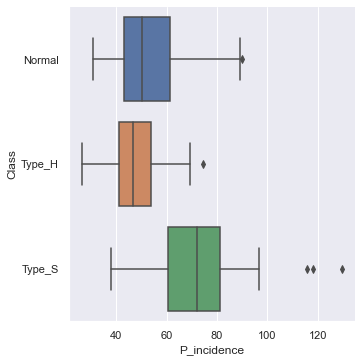

In [ ]:
sns.catplot(x="P_incidence",
               y = "Class",
               data=final_data,
               kind="box",
               );

Here we noticed that the box plot (5 point summary) of P_incidence are quite different for the 3 classes. Type_S can be easily separable using this feature but there are some overlaps between the Normal and Type_H classes. We also notice some outliers in the data however KNN will not be affected by outliers.

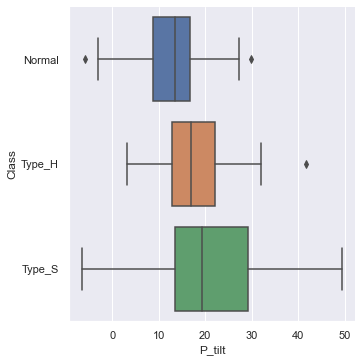

In [ ]:
sns.catplot(x="P_tilt",
               y = "Class",
               data=final_data,
               kind="box",
               );

P_tilt has some overlap for the classes but still have separability power as evident from the IQR difference. Similarly we will see the boxplot for all features for the three classes.

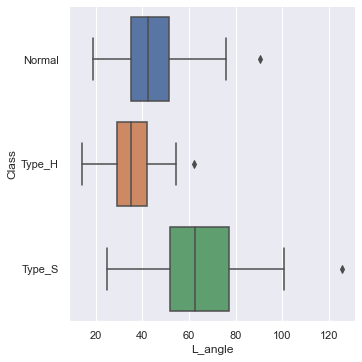

In [ ]:
sns.catplot(x="L_angle",
               y = "Class",
               data=final_data,
               kind="box",
               );

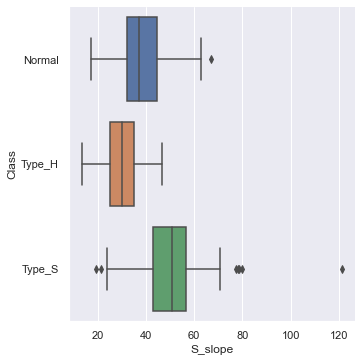

In [ ]:
sns.catplot(x="S_slope",
               y = "Class",
               data=final_data,
               kind="box",
               );

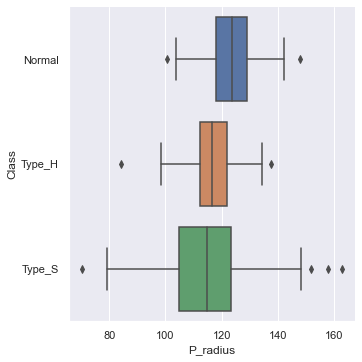

In [ ]:
sns.catplot(x="P_radius",
               y = "Class",
               data=final_data,
               kind="box",
               );

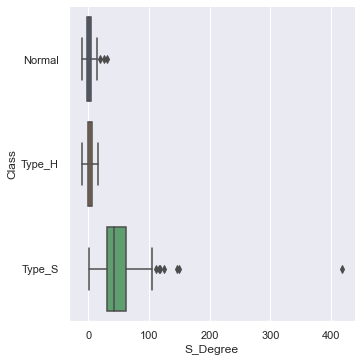

In [ ]:
sns.catplot(x="S_Degree",
               y = "Class",
               data=final_data,
               kind="box",
               );

The plot for S_Degree indicates very little difference between Normal and Type_H however Type_S has a very difference distribution.

In general we noticed that the separability is quite decent between the three classes using the given feature space.

# A pairplot to understand the separation using two features at a time

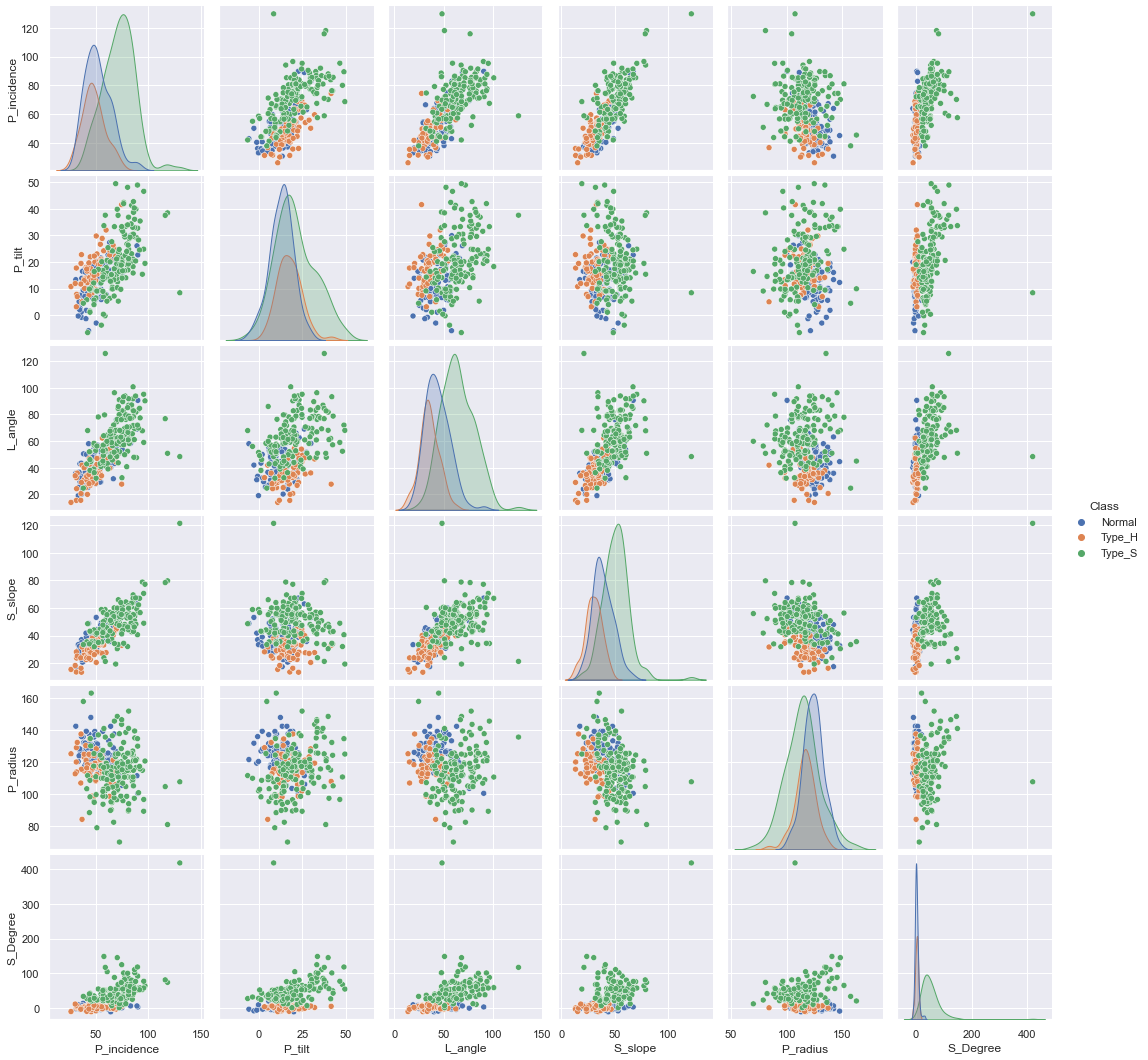

In [ ]:
sns.pairplot(data = final_data, hue = 'Class');

As also evident from the earlier boxplot analysis it will be slightly difficult to separate Blue (Normal) and Red (Type_H) as we see quite a few overlaps between then in most of the pairplots. However, Green (Type_S) is quite different from the rest of the two.

We have already checked for target balancing earlier. The data is slightly unbalanced between the three classes but still have a decent representation for all classes.

In [ ]:
((final_data['Class'].value_counts())/final_data.shape[0])*100

Type_S    48.387097
Normal    32.258065
Type_H    19.354839
Name: Class, dtype: float64

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes and target variable
x = final_data.drop(labels= "Class" , axis = 1)
y = final_data["Class"]
x.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

In [ ]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']

In [ ]:
#Normalization to nullify the effect of units in the feature variables
x_scaled = x.apply(zscore)
x_scaled.head()

P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
0    -1.277922 -0.057898 -0.907904 -1.597803  0.730468 -0.488288
1    -0.324010  0.142672 -0.017786 -0.522437  0.596124 -0.647896
2    -0.937559 -0.860412 -0.271475 -0.562386  0.849889 -0.568091
3    -0.707649 -0.009077 -0.212206 -0.901920  0.831811 -0.725568
4    -0.859732 -0.688835 -0.504914 -0.590377  0.921914 -0.791650

In [ ]:
x_scaled.describe()

P_incidence        P_tilt       L_angle       S_slope      P_radius  \
count  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02   
mean   8.702716e-17  2.326096e-16  1.980495e-16  5.121351e-17 -6.274551e-16   
std    1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00   
min   -1.996010e+00 -2.411664e+00 -2.047652e+00 -2.207741e+00 -3.597963e+00   
25%   -8.173982e-01 -6.881138e-01 -8.060267e-01 -7.168418e-01 -5.423830e-01   
50%   -1.049246e-01 -1.186061e-01 -1.278621e-01 -4.095971e-02  2.613767e-02   
75%    7.194643e-01  4.581158e-01  5.975493e-01  7.269414e-01  5.676209e-01   
max    4.029206e+00  3.191402e+00  3.984615e+00  5.855771e+00  3.395818e+00   

           S_Degree  
count  3.100000e+02  
mean  -8.156558e-17  
std    1.001617e+00  
min   -9.961725e-01  
25%   -6.585073e-01  
50%   -3.874502e-01  
75%    3.997679e-01  
max    1.046035e+01

Now we see that all feature variables has a mean close to 0 and standard deviation close to 1

In [ ]:
# Split x and y into training and test set in 75:25 ratio

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=100)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(232, 6) (78, 6) (232,) (78,)


In [ ]:
y_test.value_counts()

Type_S    47
Normal    20
Type_H    11
Name: Class, dtype: int64

# KNN Classifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
KNN.score(x_test, y_test)

0.8589743589743589

 With an arbitrary select K value of 5 we are getting an accuracy of 85% which is quite good. We will try to get a better K values using a simple plot of accuracies over a range of K values.

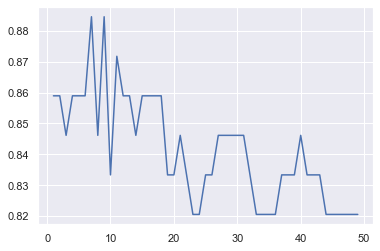

In [ ]:
scores =[]
r = range(1,50)
for k in r:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))
plt.plot(range(1,50),scores);

Thus we see clear peaks of accuracy at 2 different K values

In [ ]:
k_range = pd.concat([pd.Series(r),pd.Series(scores)], axis = 1 , sort = True)
k_range.columns = ['k', 'accuracy']
k_range.head()

k  accuracy
0  1  0.858974
1  2  0.858974
2  3  0.846154
3  4  0.858974
4  5  0.858974

In [ ]:
print('Optimal K = {}'.format(k_range.loc[k_range['accuracy'].idxmax(),'k']))

Optimal K = 7


Using the best value of K to finalize the KNN classifier model

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
KNN.score(x_test, y_test)

0.8846153846153846

We need a significant improvement over the last accuracy value of 85% that we got using K=5

In [ ]:
predicted_labels[0:11]

array(['Normal', 'Normal', 'Type_S', 'Normal', 'Type_H', 'Type_S',
       'Type_S', 'Normal', 'Type_S', 'Type_H', 'Type_S'], dtype=object)

Confusion Matrix


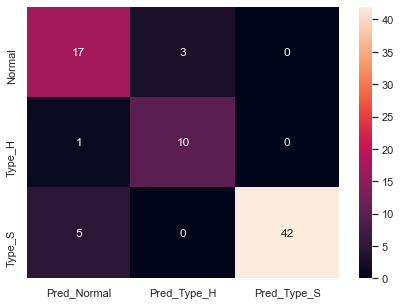

In [ ]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_H", "Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_H", "Type_S"]],
                  columns = [i for i in ["Pred_Normal", "Pred_Type_H", "Pred_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

From the above confusion matrix we observe that there are 6 case where the model has classified a person as normal when actually 5 of them is of Type_S and 1 from Type_H. This can be a cause of concern. Also there are few false positives  where we see that 3 normal persons has been classified as Type_H.Although we do not have enough information on the meaning of Type_S and Type_H to deduce which misclassification is more serious. Although we can make a general observation that classifying a person who is not normal as normal may have serious consequences and in such cases we might need to use alternative metrics such as recall and precision to fine tune our models than just accuracy.

In [ ]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.8846153846153846
Precision =  0.9005659891947518


So recall indicates out of the total TP how many are correclty predicted. 88% recall is generally considered good but this interpretation sometimes can change in medical context and we we may aim for higher recall.
Precision is the precision of prediction that is out of the predicted TP how many are correct. 90% precision is quite good.

So we have our final model with 88.46% accuracy , 88.46 % recall, and 90% precision

KNN models trained using an optimum K value of 7 performed significantly better than the model with arbitrary K value of 5. The final KNN model had an accuracy of 88.46% with 88.4 % recall and 90 % precision. This can be considered as a very good model. However, since the field of application is medical, 88.46 % accuracy may also not be good enough. We might be able to improve this using other sophisticated classification algorithms.
The data quality was fairly good however there were some discrepancies in the class entries. Standardized entries should be used. For example entries such as 'Normal' and 'Nrmal' should be avoided.
The data size was quite small. Although this might be good for KNN algorithm but the data size is small for other machine learning algorithm. One of the class Type_H had a very small representation in the data.

In [ ]:
data_1 = pd.read_csv('Part2 - Data1.csv')
data_2 = pd.read_csv('Part2 -Data2.csv')

In [ ]:
print(data_1.shape, data_2.shape)

(5000, 8) (5000, 7)


In [ ]:
data_1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [ ]:
data_2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [ ]:
data_2.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

Here, we observe that the dataset is devided in two parts with part-1 having some of the feature variables and part-2 mainly has binary categorical features such as whether the customer has Security or not, FD or not etc. and the target variable LoanOnCard. We also see that there are 20 customers for whome we do not have Loan information and hence they cannot be used to develop a model to predict whether a customer will opt for Loan or Not as we have no idea whether these customers had a loan in past or not. The two datasets should be merged as one using the ID column to create a final dataset for model building.

In [ ]:
loan_data = pd.merge(data_1,data_2,how='inner',on='ID')

In [ ]:
loan_data.shape

(5000, 14)

In [ ]:
loan_data.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

Now, we have a final loan dataset with all information in once dataframe.

In [ ]:
loan_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

'ID' is not required for modelling and hence can be dropped. 'ZipCode' indicates an area and can be considered as a categorical variable instead of being an integer. All binary variable (1---> indicating presence 0 ---> absense are integers and can be directly used in an ML algorithm).

In [ ]:
loan_data.Level.unique()

array([1, 2, 3], dtype=int64)

In [ ]:
loan_data.ZipCode.nunique()

467

Now there are many ZipCodes and the type is integer but one ZipCode greater than another does not make much sense. This is a perfect example of nominal variable with high cardinality. With high cardinality dummy encoding can be a problem as this will increase the dimentionality of the data. We might use Supervised Ratio transformation to use this feature variable in the model. Instead of using the ZipCode directly we can use Ratio of the number of customers with LoanOnCard as 1 to the total number of customers in that ZipCode. This will capture information like whether a particular ZipCode customer has a high probability of conversion without using a nominal variable with very high cardinality.

We can use historical data to assign this ratio for each ZipCode in the data and can use this for transforming the ZipCode in Production as well

In [ ]:
#Supervised ratio transformation for the ZipCodes
zipcode = loan_data.loc[loan_data['LoanOnCard'].notnull(),['ZipCode','LoanOnCard']]
zipcode['Count'] = 1
print(zipcode.shape)

(4980, 3)


In [ ]:
zipcode.head()

ZipCode  LoanOnCard  Count
9     93023         1.0      1
10    94710         0.0      1
11    90277         0.0      1
12    93106         0.0      1
13    94920         0.0      1

In [ ]:
zipcode_transformed = zipcode.groupby('ZipCode').sum()
zipcode_transformed['ZipScore'] = zipcode_transformed['LoanOnCard']/zipcode_transformed['Count']

In [ ]:
zipcode_transformed.head()

LoanOnCard  Count  ZipScore
ZipCode                             
9307            0.0      1       0.0
90005           0.0      5       0.0
90007           0.0      6       0.0
90009           0.0      8       0.0
90011           0.0      3       0.0

In [ ]:
zipcode_transformed.reset_index(inplace=True)

In [ ]:
zipcode_transformed.head()

ZipCode  LoanOnCard  Count  ZipScore
0     9307         0.0      1       0.0
1    90005         0.0      5       0.0
2    90007         0.0      6       0.0
3    90009         0.0      8       0.0
4    90011         0.0      3       0.0

In [ ]:
def zip_transform(data, columnName):
    data = pd.merge(zipcode_transformed.loc[:,['ZipCode','ZipScore']],data,how='right',left_on='ZipCode',right_on=columnName)
    return data

In [ ]:
loan_data = zip_transform(loan_data,'ZipCode')

In [ ]:
loan_data.head()

ZipCode  ZipScore   ID  Age  CustomerSince  HighestSpend  HiddenScore  \
0    91107     0.125    1   25              1            49            4   
1    91107     0.125  456   30              4            60            4   
2    91107     0.125  460   35             10           200            2   
3    91107     0.125  576   54             30            93            1   
4    91107     0.125  955   37             12           169            2   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  2.2      2         0         0                    0   
2                  3.0      1       458         0                    0   
3                  2.7      2         0         0                    0   
4                  5.2      3       249         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                1           0         0.0  
2                0           0         0.0  
3                1           0         0.0  
4                1           0         1.0

In [ ]:
loan_data.drop(['ID','ZipCode'], axis = 1, inplace=True)

In [ ]:
loan_data.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0     0.125   25              1            49            4   
1     0.125   30              4            60            4   
2     0.125   35             10           200            2   
3     0.125   54             30            93            1   
4     0.125   37             12           169            2   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  2.2      2         0         0                    0   
2                  3.0      1       458         0                    0   
3                  2.7      2         0         0                    0   
4                  5.2      3       249         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                1           0         0.0  
2                0           0         0.0  
3                1           0         0.0  
4                1           0         1.0

In [ ]:
loan_data = loan_data.loc[loan_data['LoanOnCard'].notnull(),:]
loan_data.reset_index(inplace=True)

In [ ]:
loan_data.head()

index  ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0      1     0.125   30              4            60            4   
1      2     0.125   35             10           200            2   
2      3     0.125   54             30            93            1   
3      4     0.125   37             12           169            2   
4      5     0.125   36              6            78            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  2.2      2         0         0                    0   
1                  3.0      1       458         0                    0   
2                  2.7      2         0         0                    0   
3                  5.2      3       249         0                    0   
4                  1.8      3       163         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                1           0         0.0  
1                0           0         0.0  
2                1           0         0.0  
3                1           0         1.0  
4                0           0         0.0

In [ ]:
loan_data.drop('index',axis=1,inplace=True)

In [ ]:
loan_data.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
0     0.125   30              4            60            4   
1     0.125   35             10           200            2   
2     0.125   54             30            93            1   
3     0.125   37             12           169            2   
4     0.125   36              6            78            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  2.2      2         0         0                    0   
1                  3.0      1       458         0                    0   
2                  2.7      2         0         0                    0   
3                  5.2      3       249         0                    0   
4                  1.8      3       163         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                1           0         0.0  
1                0           0         0.0  
2                1           0         0.0  
3                1           0         1.0  
4                0           0         0.0

In [ ]:
loan_data['LoanOnCard'] = loan_data['LoanOnCard'].astype(int)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZipScore             4980 non-null   float64
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   HiddenScore          4980 non-null   int64  
 5   MonthlyAverageSpend  4980 non-null   float64
 6   Level                4980 non-null   int64  
 7   Mortgage             4980 non-null   int64  
 8   Security             4980 non-null   int64  
 9   FixedDepositAccount  4980 non-null   int64  
 10  InternetBanking      4980 non-null   int64  
 11  CreditCard           4980 non-null   int64  
 12  LoanOnCard           4980 non-null   int32  
dtypes: float64(2), int32(1), int64(10)
memory usage: 486.5 KB


Now our dataset has 4980 record as 20 records dropped since we do not have loan information available for such records. We are now using ZipScore instead of ZipCode. And there are no null values in the dataset. We can now use this data for further processing.

We will see box plots for each numerical feature variables separately for the classes. This will give us an idea of how the distributions vary between the classes.

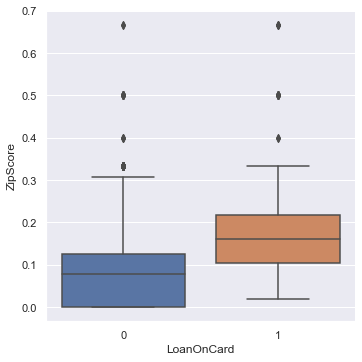

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "ZipScore",
               data=loan_data,
               kind="box",
               );

It is great that we see a good separation between the 0 and 1 class using our transformed ZipScore feature.There are a few outliers in the data.

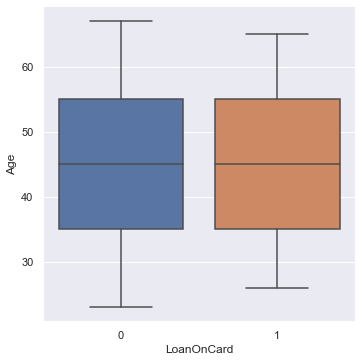

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "Age",
               data=loan_data,
               kind="box",
               );

Age does not seem to have a great predictive power as the distribution are very similar for both the classes

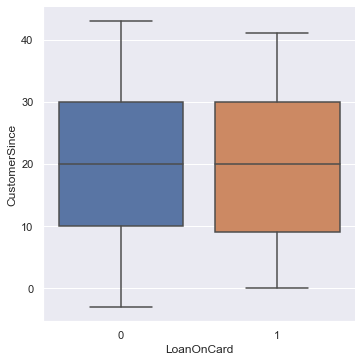

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "CustomerSince",
               data=loan_data,
               kind="box",
               );

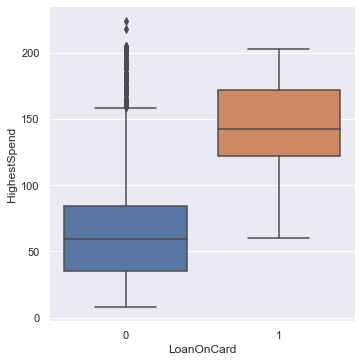

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "HighestSpend",
               data=loan_data,
               kind="box",
               );

Highest Spend can be a very useful feature. The distribution is completely different for the two classes. The median for LoanOnCard = 1 is much higher than the 0 class. The customers with LoanOncard has much higher spend.

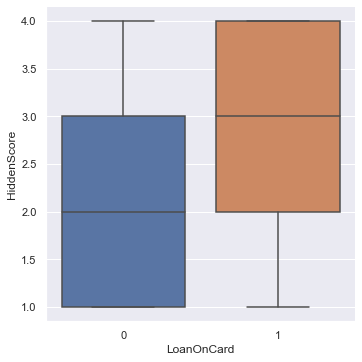

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "HiddenScore",
               data=loan_data,
               kind="box",
               );

In [ ]:
pd.crosstab(loan_data.HiddenScore,loan_data.LoanOnCard)

LoanOnCard      0    1
HiddenScore           
1            1359  107
2            1187  106
3             873  133
4            1081  134

Although there is overlap but still this feature can be useful to separate the two classes. Score 1 and 2 has greater % of 0 cases and Score 3 and 4 has greater % of 1 cases

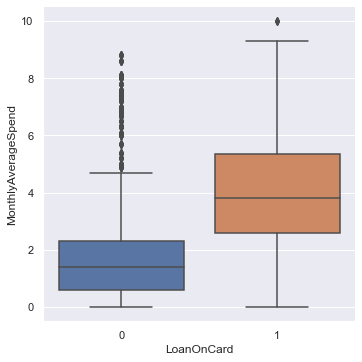

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "MonthlyAverageSpend",
               data=loan_data,
               kind="box",
               );

As expected this can be a good differentiator

In [ ]:
pd.crosstab(loan_data.Level,loan_data.LoanOnCard)

LoanOnCard     0    1
Level                
1           1996   93
2           1213  182
3           1291  205

Higher level has greater % of 1 cases

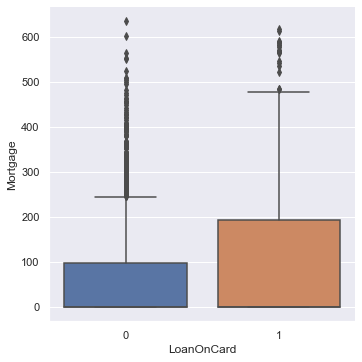

In [ ]:
sns.catplot(x="LoanOnCard",
               y = "Mortgage",
               data=loan_data,
               kind="box",
               );

In [ ]:
pd.crosstab(loan_data.Security,loan_data.LoanOnCard)

LoanOnCard     0    1
Security             
0           4040  420
1            460   60

Most of the cases in both classes fall in 0 security. May not be a very useful feature.

In [ ]:
pd.crosstab(loan_data.FixedDepositAccount,loan_data.LoanOnCard)

LoanOnCard              0    1
FixedDepositAccount           
0                    4338  340
1                     162  140

Again majority cases in both classes do not have a FD account

In [ ]:
pd.crosstab(loan_data.CreditCard,loan_data.LoanOnCard)

LoanOnCard     0    1
CreditCard           
0           3177  337
1           1323  143

Approximately 70% in both classes had no credit card

In [ ]:
pd.crosstab(loan_data.InternetBanking,loan_data.LoanOnCard)

LoanOnCard          0    1
InternetBanking           
0                1817  189
1                2683  291

40 % of the cases in both classes has not internet banking

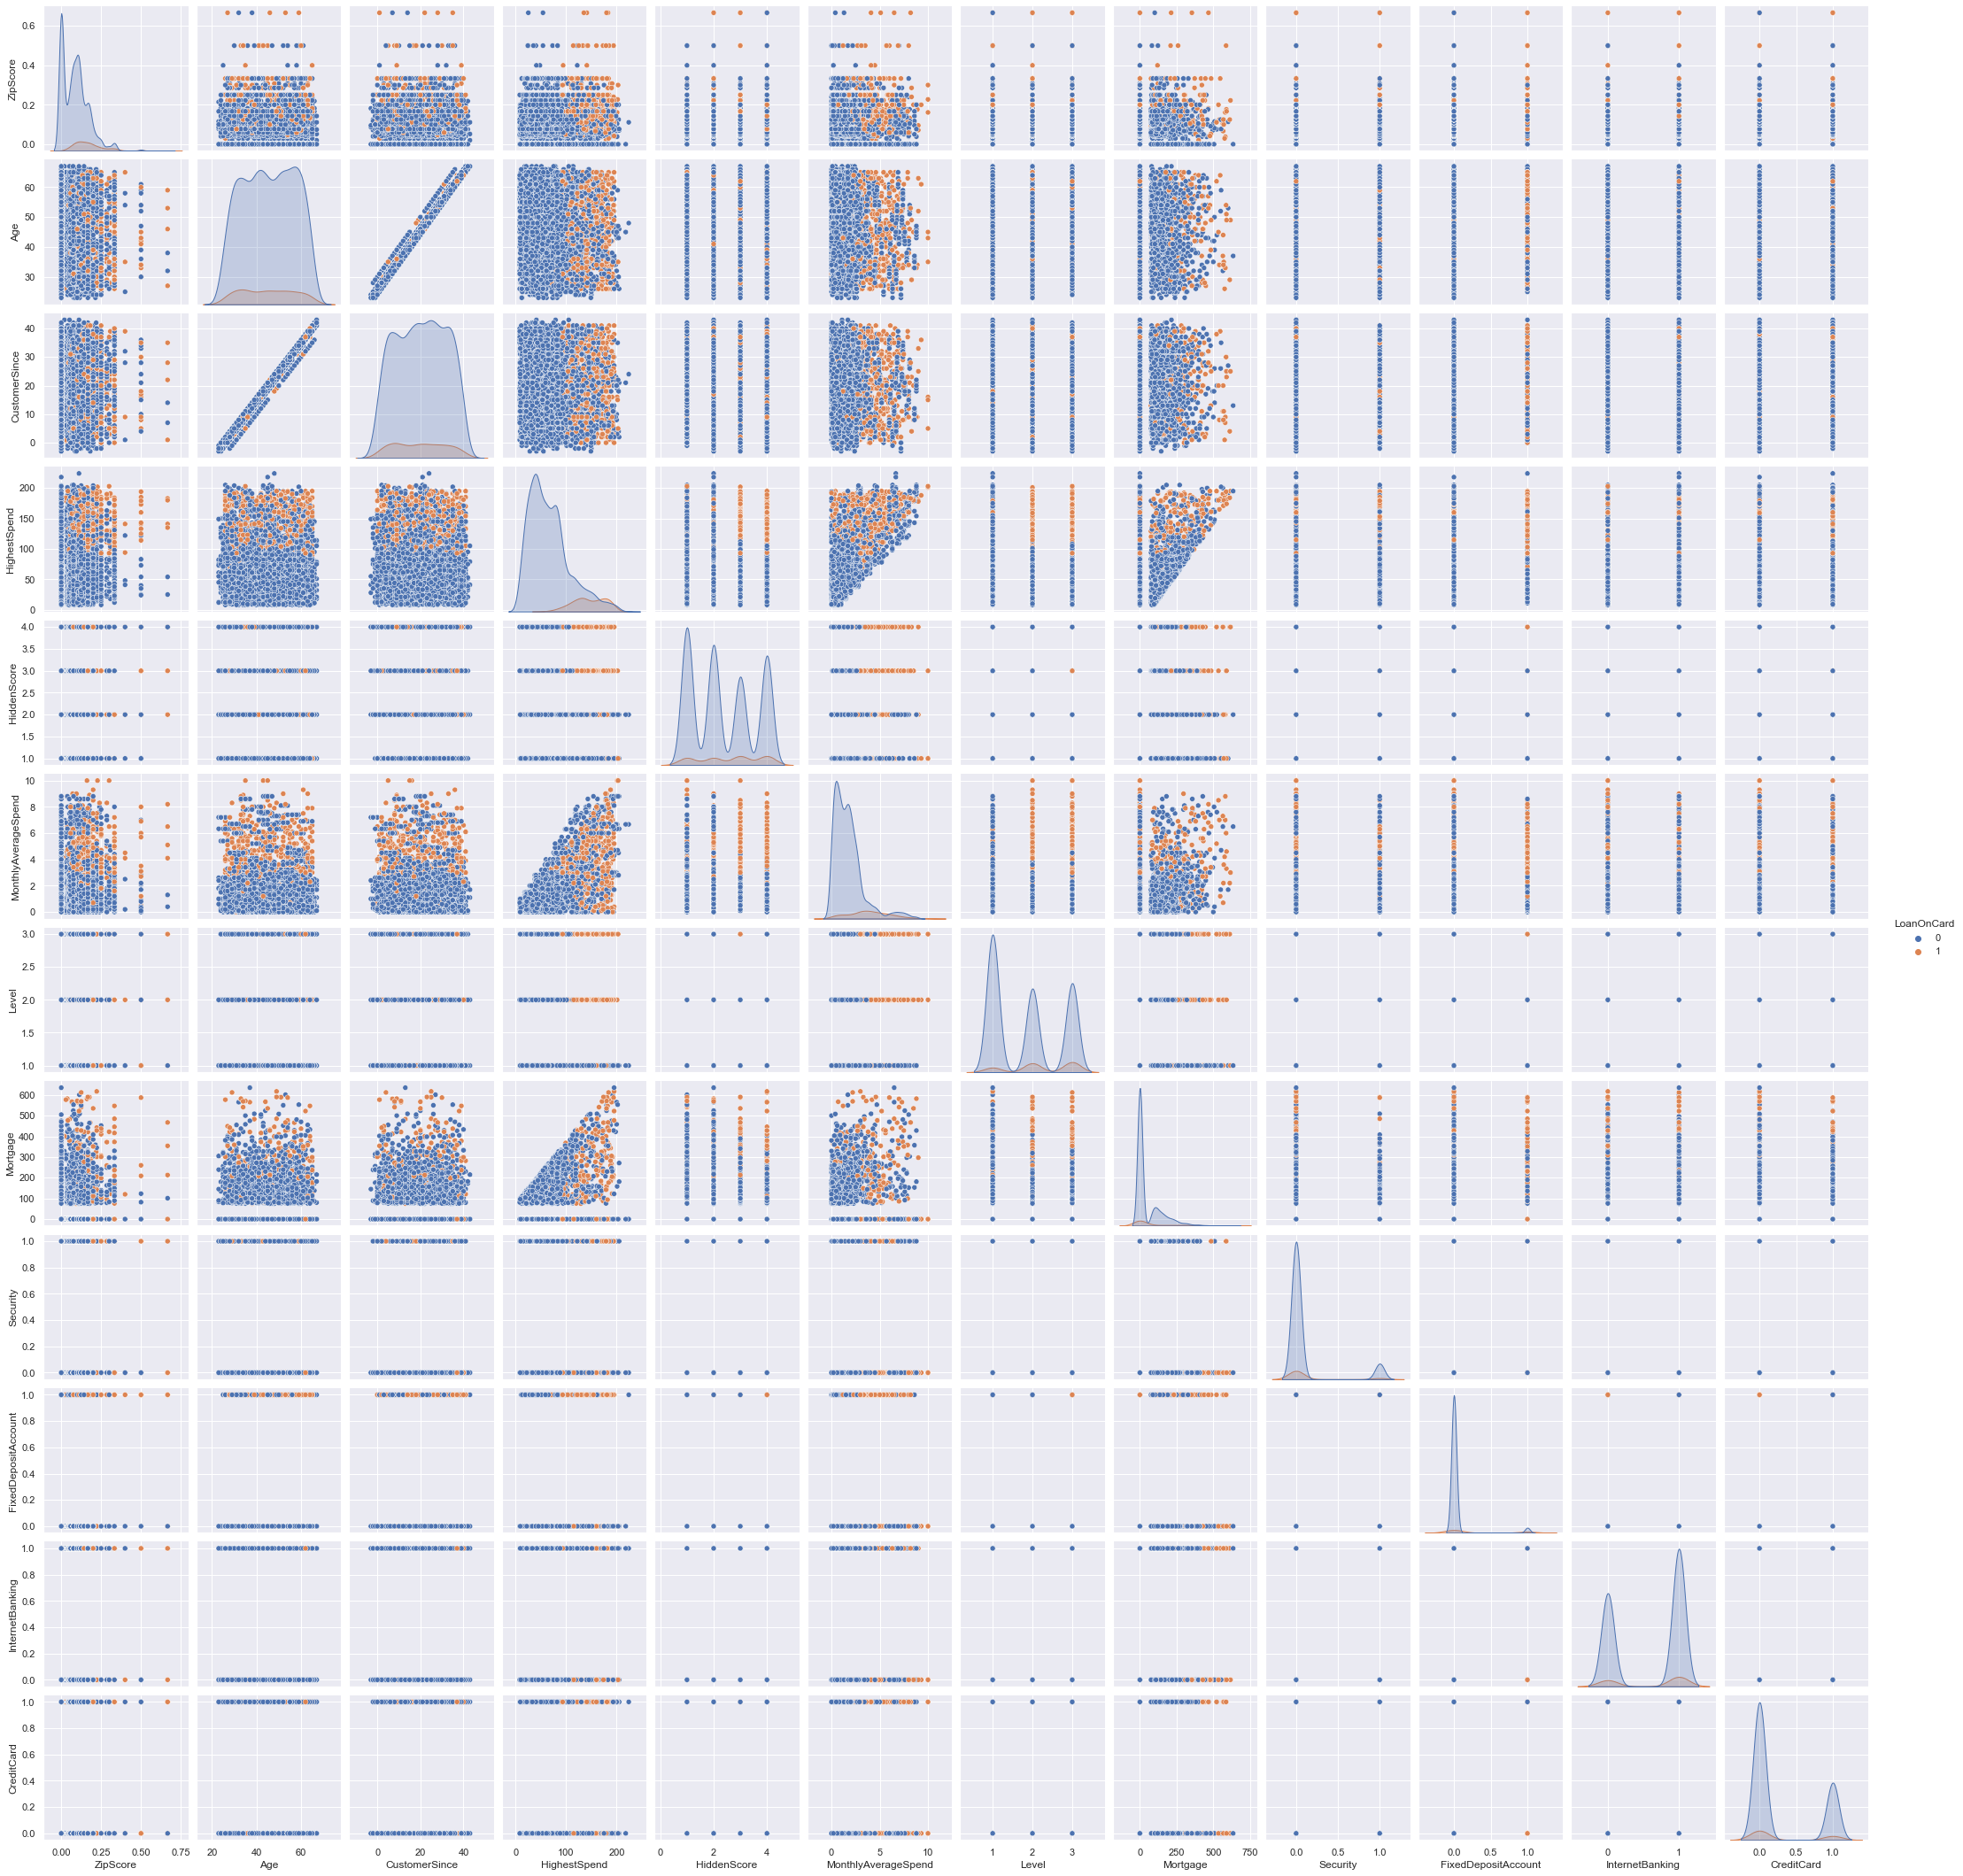

In [ ]:
sns.pairplot(loan_data,diag_kind='kde',hue='LoanOnCard');

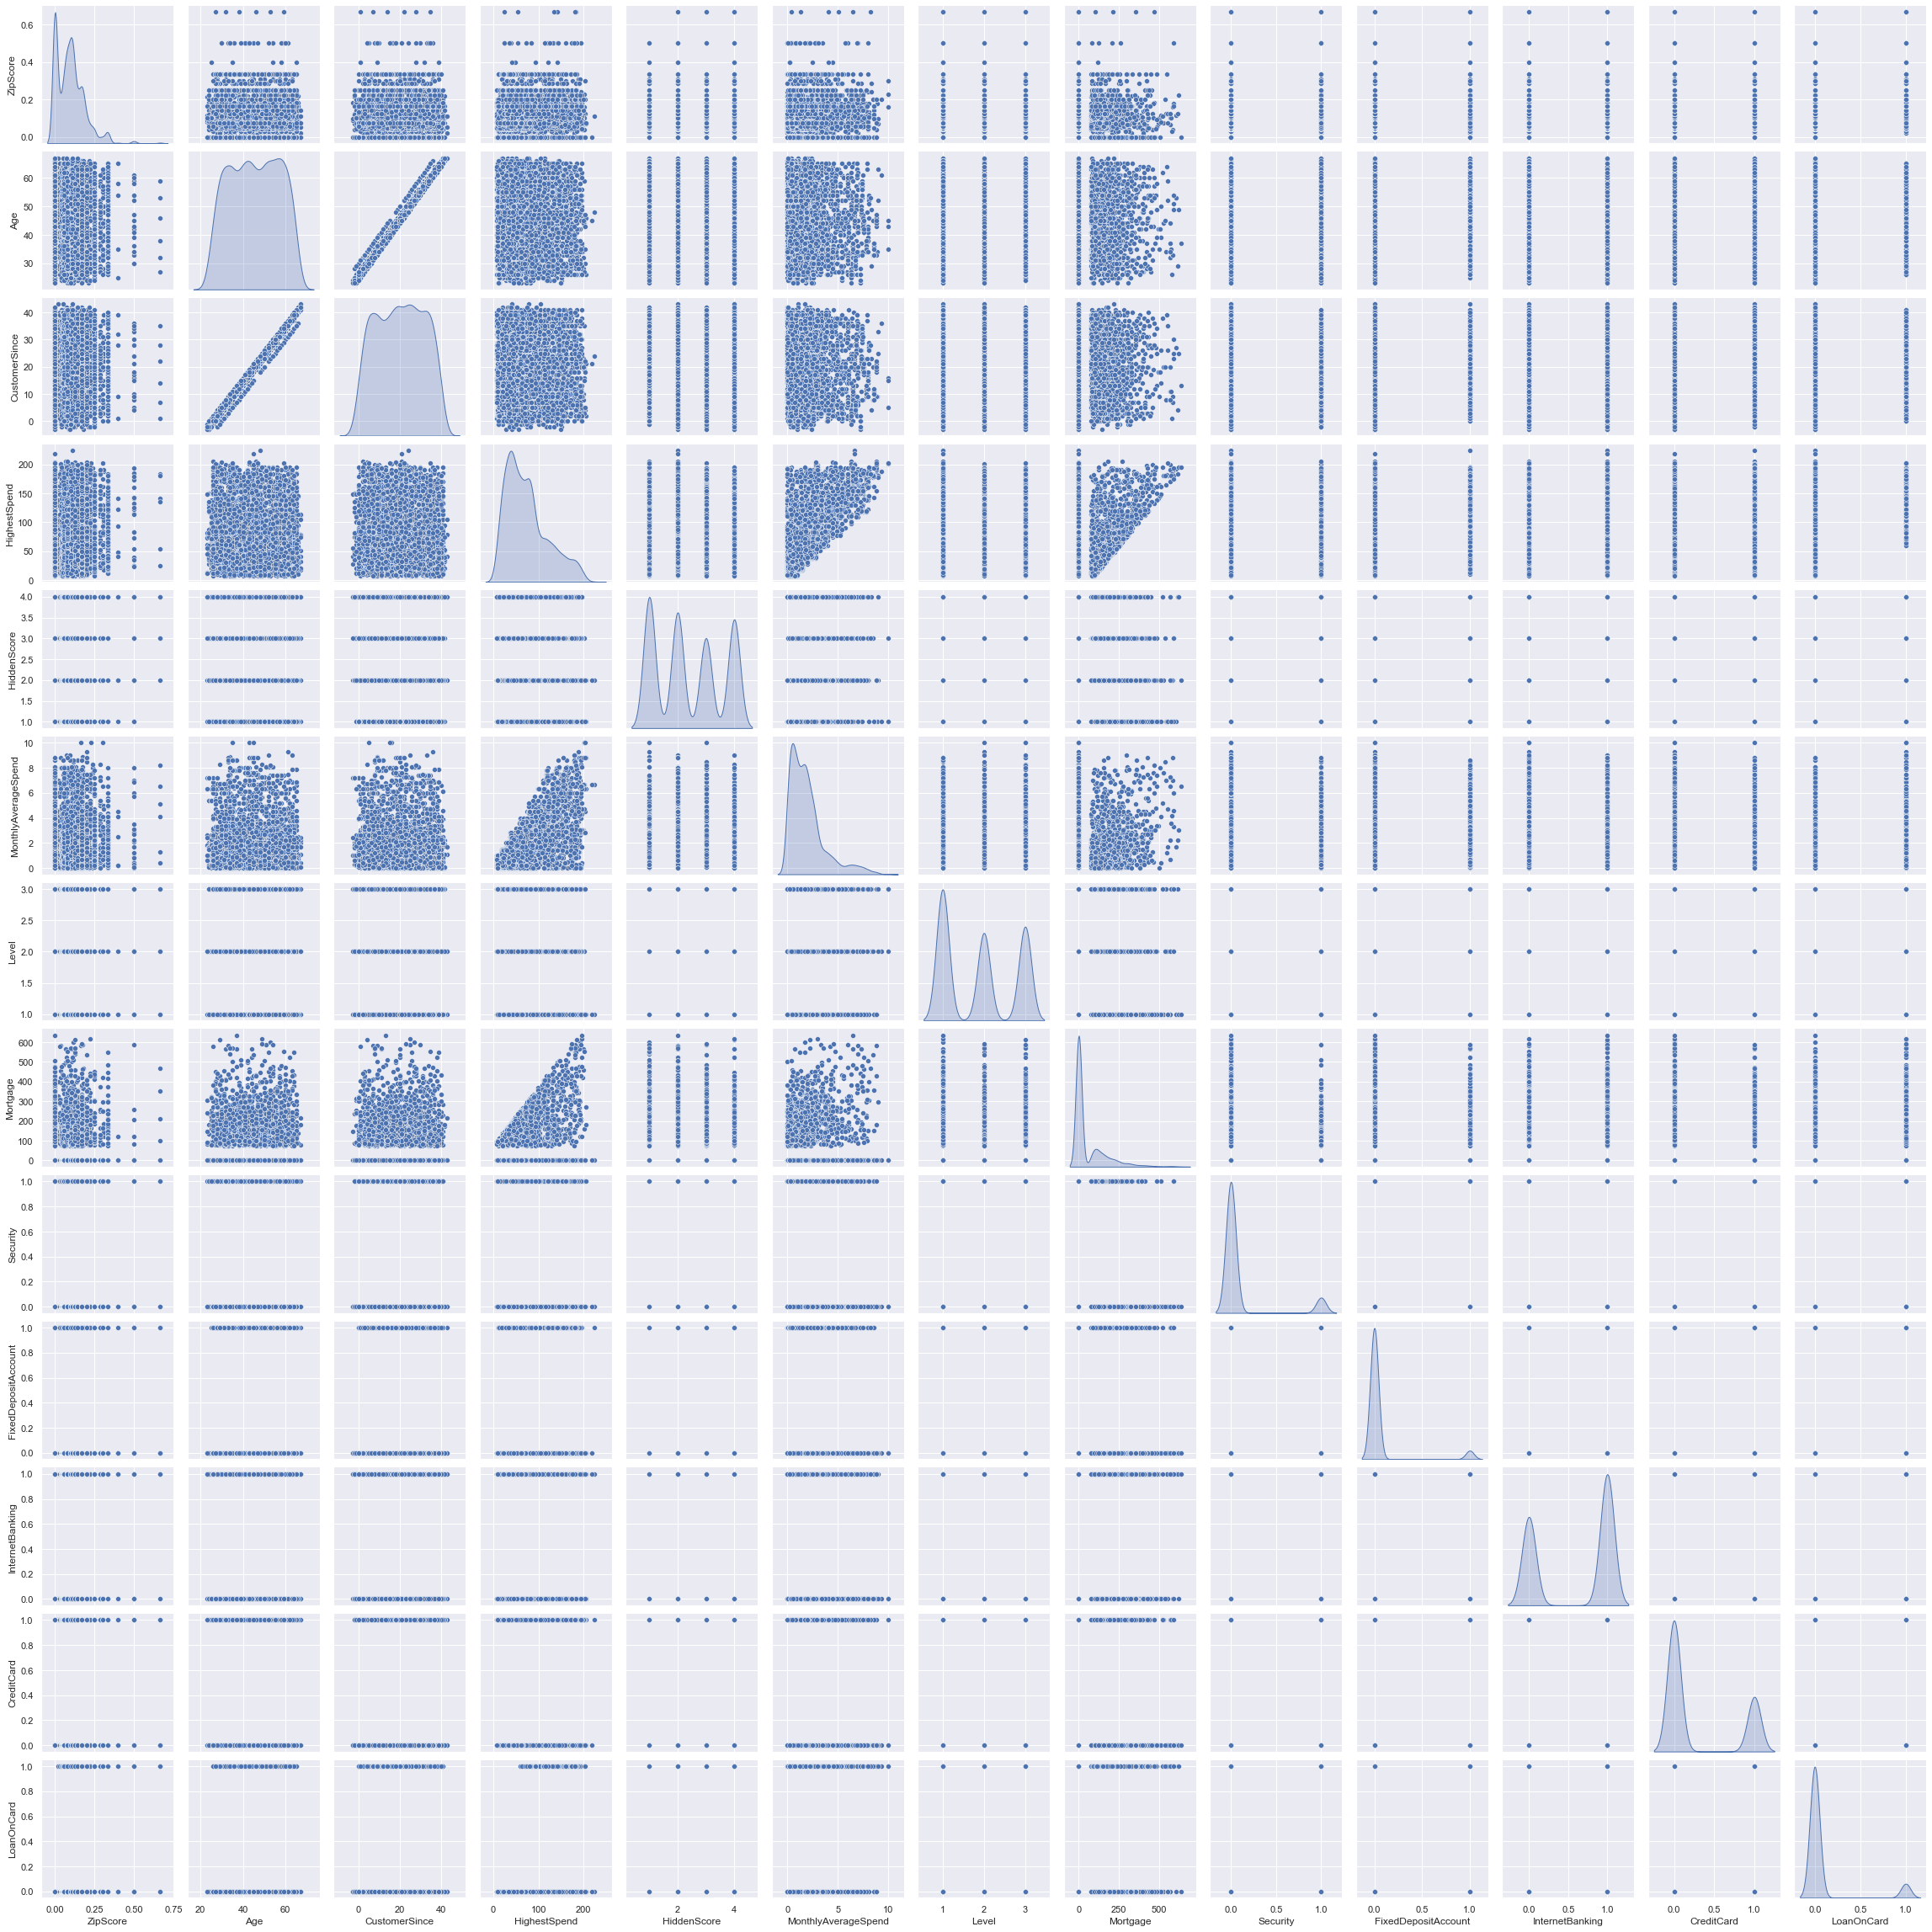

In [ ]:
sns.pairplot(loan_data,diag_kind='kde');

In [ ]:
#Checking Correlation
loan_data.corr()

ZipScore       Age  CustomerSince  HighestSpend  \
ZipScore             1.000000 -0.021578      -0.019498      0.145042   
Age                 -0.021578  1.000000       0.994208     -0.054951   
CustomerSince       -0.019498  0.994208       1.000000     -0.046092   
HighestSpend         0.145042 -0.054951      -0.046092      1.000000   
HiddenScore          0.017451 -0.045289      -0.051456     -0.158357   
MonthlyAverageSpend  0.124480 -0.051896      -0.049918      0.646109   
Level                0.040437  0.042750       0.014545     -0.188909   
Mortgage             0.019186 -0.013272      -0.011380      0.207236   
Security             0.002484  0.000323      -0.000469     -0.002284   
FixedDepositAccount  0.125216  0.007744       0.010085      0.169535   
InternetBanking      0.017486  0.011227       0.011355      0.014202   
CreditCard           0.033386  0.007344       0.008779     -0.002780   
LoanOnCard           0.298045 -0.008147      -0.007801      0.502626   

                     HiddenScore  MonthlyAverageSpend     Level  Mortgage  \
ZipScore                0.017451             0.124480  0.040437  0.019186   
Age                    -0.045289            -0.051896  0.042750 -0.013272   
CustomerSince          -0.051456            -0.049918  0.014545 -0.011380   
HighestSpend           -0.158357             0.646109 -0.188909  0.207236   
HiddenScore             1.000000            -0.109180  0.065762 -0.021396   
MonthlyAverageSpend    -0.109180             1.000000 -0.137020  0.110275   
Level                   0.065762            -0.137020  1.000000 -0.032863   
Mortgage               -0.021396             0.110275 -0.032863  1.000000   
Security                0.019061             0.015105 -0.009443 -0.005002   
FixedDepositAccount     0.014327             0.136410  0.013982  0.089167   
InternetBanking         0.010900            -0.003475 -0.014556 -0.007044   
CreditCard              0.010784            -0.006577 -0.011766 -0.007600   
LoanOnCard              0.061761             0.366912  0.137010  0.141947   

                     Security  FixedDepositAccount  InternetBanking  \
ZipScore             0.002484             0.125216         0.017486   
Age                  0.000323             0.007744         0.011227   
CustomerSince       -0.000469             0.010085         0.011355   
HighestSpend        -0.002284             0.169535         0.014202   
HiddenScore          0.019061             0.014327         0.010900   
MonthlyAverageSpend  0.015105             0.136410        -0.003475   
Level               -0.009443             0.013982        -0.014556   
Mortgage            -0.005002             0.089167        -0.007044   
Security             1.000000             0.317673         0.014007   
FixedDepositAccount  0.317673             1.000000         0.176082   
InternetBanking      0.014007             0.176082         1.000000   
CreditCard          -0.014518             0.278924         0.004960   
LoanOnCard           0.021982             0.316131         0.006034   

                     CreditCard  LoanOnCard  
ZipScore               0.033386    0.298045  
Age                    0.007344   -0.008147  
CustomerSince          0.008779   -0.007801  
HighestSpend          -0.002780    0.502626  
HiddenScore            0.010784    0.061761  
MonthlyAverageSpend   -0.006577    0.366912  
Level                 -0.011766    0.137010  
Mortgage              -0.007600    0.141947  
Security              -0.014518    0.021982  
FixedDepositAccount    0.278924    0.316131  
InternetBanking        0.004960    0.006034  
CreditCard             1.000000    0.002536  
LoanOnCard             0.002536    1.000000

In [ ]:
# However we want to see correlation in graphical representation
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

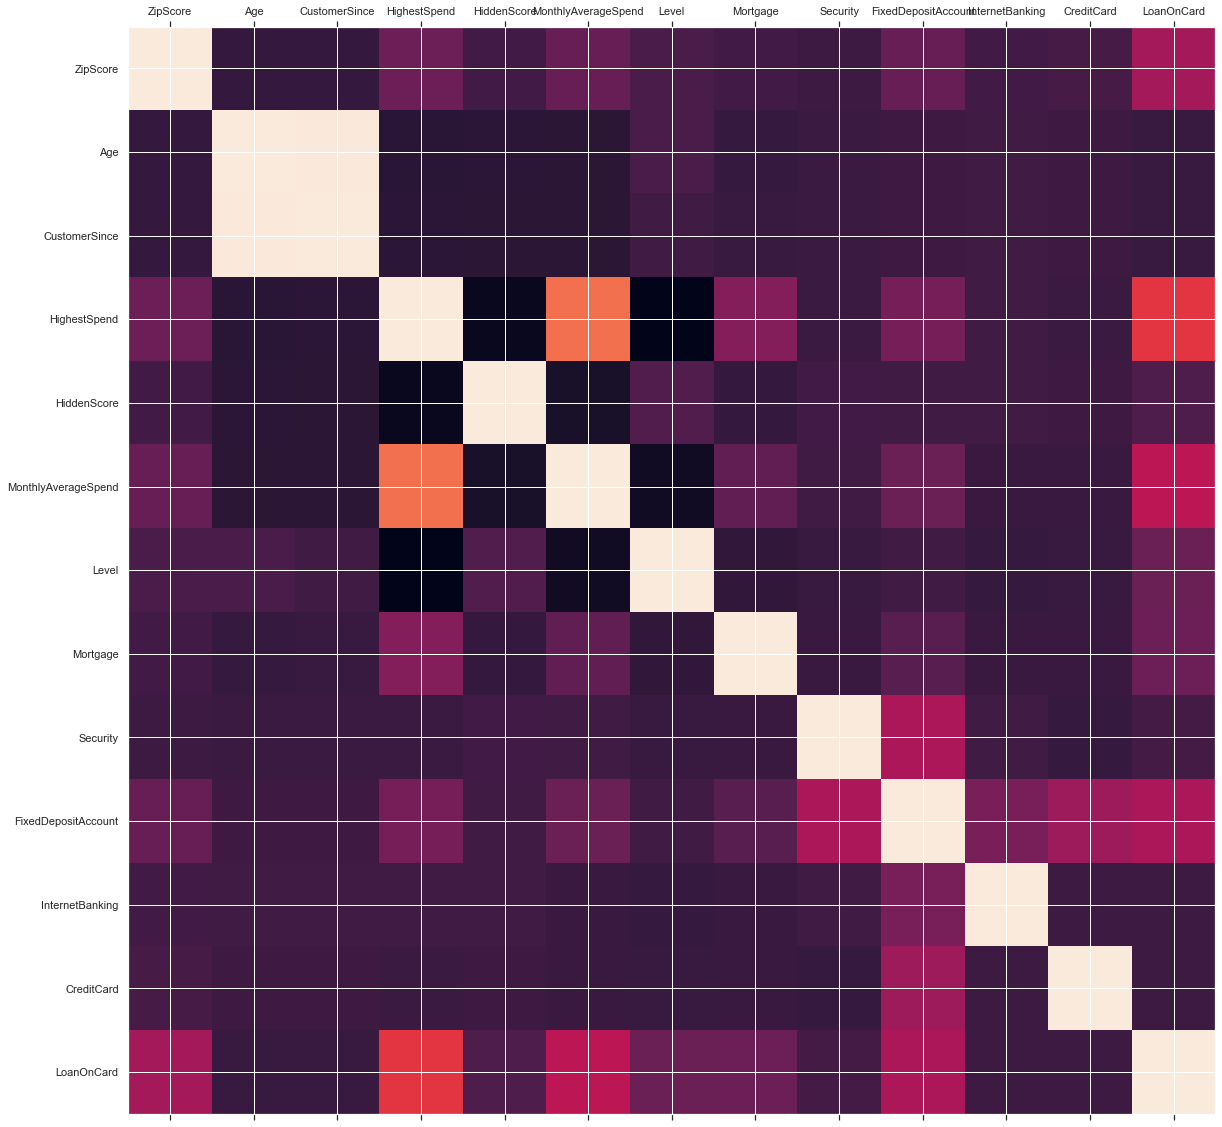

In [ ]:
plot_corr(loan_data)

The feature varibales are not highly correlated with each other which is desirable however Age and CustomerSince are highly correlated and we may want to use either one of them in the model

# Checking ratio of customers with and without LoanOnCard

In [ ]:
#Checking for Class inbalance
l_true = len(loan_data.loc[loan_data['LoanOnCard'] == 1])
l_false = len(loan_data.loc[loan_data['LoanOnCard'] == 0])
print("Number of Loan cases: {0} ({1:2.2f}%)".format(l_true, (l_true / (l_true + l_false)) * 100 ))
print("Number of No Loan cases: {0} ({1:2.2f}%)".format(l_false, (l_false / (l_true + l_false)) * 100))

Number of Loan cases: 480 (9.64%)
Number of No Loan cases: 4500 (90.36%)


Approximately 10% of the customers had a Loan which is an unbalanced distribution. The trained model might be biased towards predicting 0. We may use undersampling, oversampling or class weight to improve model accuracies and other performance metric. We will first try to fit a model with existing distribution and then can experiment with class weights or undersampling of the dominant class to get a better model.

# Train and Test Split

In [ ]:
#We will use a 75:25 split for the training and test set
from sklearn.model_selection import train_test_split

x = loan_data.drop('LoanOnCard',axis=1)     # Predictor feature columns
y = loan_data['LoanOnCard']   # Predicted class (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)
# 1 is just any random seed number

x_train.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
2581  0.111111   35              9           142            2   
1982  0.092593   47             21            22            1   
53    0.181818   25             -1           113            4   
1838  0.043478   48             23            74            1   
2660  0.000000   27              3            18            1   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
2581                  0.0      1         0         1                    0   
1982                  0.2      1       104         0                    0   
53                    2.1      3         0         0                    0   
1838                  1.2      1         0         0                    0   
2660                  0.4      3         0         0                    0   

      InternetBanking  CreditCard  
2581                1           0  
1982                0           0  
53                  1           0  
1838                1           0  
2660                0           0

In [ ]:
y_train.head()

2581    0
1982    0
53      0
1838    0
2660    0
Name: LoanOnCard, dtype: int32

In [ ]:
#Check the split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan_data.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [ ]:
#Check the proportion of customer with and without loans
print("Original Customer with Loan    : {0} ({1:0.2f}%)".format(len(loan_data.loc[loan_data['LoanOnCard'] == 1]), (len(loan_data.loc[loan_data['LoanOnCard'] == 1])/len(loan_data.index)) * 100))
print("Original Customer without  Loan   : {0} ({1:0.2f}%)".format(len(loan_data.loc[loan_data['LoanOnCard'] == 0]), (len(loan_data.loc[loan_data['LoanOnCard'] == 0])/len(loan_data.index)) * 100))
print("")
print("Training Customer with Loan    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Customer without  Loan   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Customer with Loan        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Customer without  Loan       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Customer with Loan    : 480 (9.64%)
Original Customer without  Loan   : 4500 (90.36%)

Training Customer with Loan    : 348 (9.32%)
Training Customer without  Loan   : 3387 (90.68%)

Test Customer with Loan        : 132 (10.60%)
Test Customer without  Loan       : 1113 (89.40%)



Thus we see that the ratio is maintained between the train and test group and it is aligned with the original data

Out data is ready to fit a model

In [ ]:
x_train.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
2581  0.111111   35              9           142            2   
1982  0.092593   47             21            22            1   
53    0.181818   25             -1           113            4   
1838  0.043478   48             23            74            1   
2660  0.000000   27              3            18            1   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
2581                  0.0      1         0         1                    0   
1982                  0.2      1       104         0                    0   
53                    2.1      3         0         0                    0   
1838                  1.2      1         0         0                    0   
2660                  0.4      3         0         0                    0   

      InternetBanking  CreditCard  
2581                1           0  
1982                0           0  
53                  1           0  
1838                1           0  
2660                0           0

In [ ]:
y_train.head()

2581    0
1982    0
53      0
1838    0
2660    0
Name: LoanOnCard, dtype: int32

In [ ]:
x_test.head()

ZipScore  Age  CustomerSince  HighestSpend  HiddenScore  \
1505  0.166667   37             12           182            3   
4133  0.142857   35              9           109            3   
3501  0.058824   43             18            60            2   
3302  0.100000   53             26            22            1   
1206  0.051724   49             24            18            1   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
1505                  5.8      3         0         0                    0   
4133                  4.0      1         0         0                    0   
3501                  2.2      3         0         0                    0   
3302                  0.5      2         0         0                    0   
1206                  0.4      3       121         0                    0   

      InternetBanking  CreditCard  
1505                1           0  
4133                0           0  
3501                0           1  
3302                1           1  
1206                1           0

In [ ]:
y_test.head()

1505    1
4133    1
3501    0
3302    0
1206    0
Name: LoanOnCard, dtype: int32

# Logistic Regression

          0         1         2         3         4         5         6  \
0  5.182157 -0.410329  0.420628  0.050299  0.600809  0.094102  1.686994   

          7         8         9        10       11  intercept  
0  0.001447 -0.712921  3.095542 -0.677331 -1.07225  -2.920982  


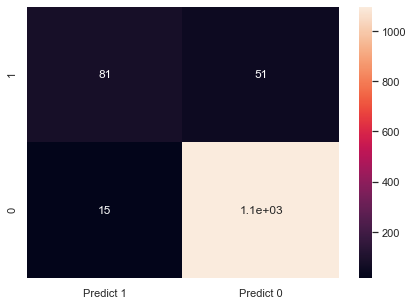

In [ ]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.946987951807229
Recall =  0.6136363636363636
Precision =  0.84375


If the predictor variables has a good separation capability we can get good accuracy even with an unbalanced class distribution as we can see from the above accuracy measure. However, accuracy may not always be the best measure of the model performance particularly for unbalanced classes. We see that the recall of this model is very low (around 61%). This means that we are not able to identify all 1 cases properly. The objective of the model is to maximize coversion ratio and hence we do not want to miss on many actual true cases. Therefore, in addition to accuracy we need to consider recall as well (the ability of the model to identify True cases) but at the same time precision of the prediction should not be very low as we have limited budget.

We have earlier seen that Age and CustomerSince are highly correlated and hence only one of them should be included in the model.

Recall = TP/(TP+FN)  ---> The capability of the model to identify True cases

Precision = TP/(TP+FP) ---> How efficient out targeting will be. That means in order to correctly identify all True cases how may False cases will get some campaigns (High precision will help save money as we will not be targeting actual False cases)

We will drop CustomerSince from our model and play with class weights to see if we can get a model that can achieve our objective

          0         1         2         3         4         5         6  \
0  4.873551 -0.008222  0.041731  0.426549  0.068366  1.214244  0.000925   

          7         8         9        10  intercept  
0 -0.722588  2.992037 -0.682294 -1.056775 -10.032335  


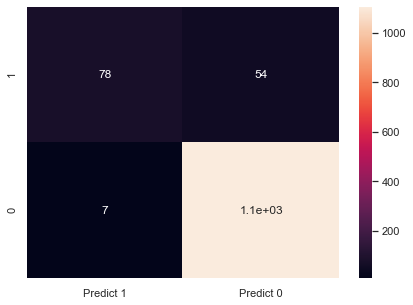

In [ ]:
#Dropping CustomerSince (not inplace) to check the effect
model = LogisticRegression(solver="liblinear")
model.fit(x_train.drop('CustomerSince',axis=1), y_train)
#predict on test
y_predict = model.predict(x_test.drop('CustomerSince',axis=1))
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
model_score = model.score(x_test.drop('CustomerSince',axis=1), y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.951004016064257
Recall =  0.5909090909090909
Precision =  0.9176470588235294


Although the accuracy improved slightly but the recall has gone down even further.

Let us try some adjustments using class weights to compensate for unbalanced class distribution

          0         1         2         3         4         5         6  \
0  7.155234 -0.265804  0.271426  0.050124  0.530401  0.201482  1.426506   

         7         8         9        10        11  intercept  
0  0.00132 -0.897616  3.555701 -0.778489 -1.148529  -4.100077  


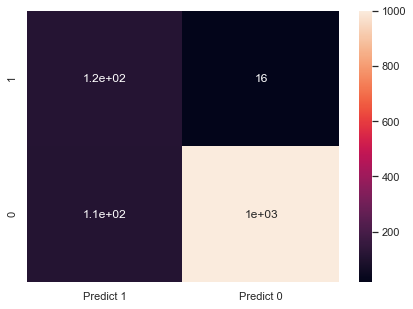

In [ ]:
model = LogisticRegression(solver="liblinear", class_weight = 'balanced')
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.8971887550200803
Recall =  0.8787878787878788
Precision =  0.5087719298245614


Balanced Class weight has improved recall drastically however the precision and accuracy has gone down

Using explicit class weights

          0         1         2        3         4         5         6  \
0  7.395119 -0.277026  0.285443  0.05009  0.575216  0.149454  1.536375   

          7         8         9        10        11  intercept  
0  0.001443 -0.884107  3.564811 -0.752948 -1.146124  -4.952513  


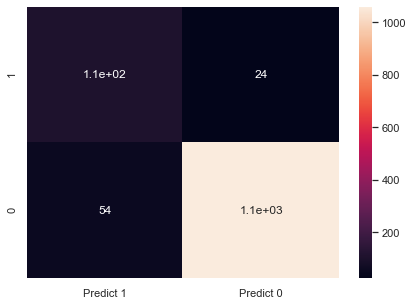

In [ ]:
model = LogisticRegression(solver="liblinear", class_weight = {0:1,1:4})
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
#Performance metrics in test set
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.9373493975903614
Recall =  0.8181818181818182
Precision =  0.6666666666666666


In [ ]:
#Performance metrics in training set
model_score = model.score(x_train, y_train)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_train,model.predict(x_train)))
print('Precision = ', sklearn.metrics.precision_score(y_train,model.predict(x_train)))

0.9421686746987952
Recall =  0.8390804597701149
Precision =  0.6460176991150443


In [ ]:
#Complete Classification report on Test Set
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.82      0.73       132
           0       0.98      0.95      0.96      1113

    accuracy                           0.94      1245
   macro avg       0.82      0.88      0.85      1245
weighted avg       0.94      0.94      0.94      1245



With explicit class weights (class 1 getting 4 times more weight than class 0) we are getting approximately 82% recall with 93% accuracy. Precision of this model is also 66%. This means we are correctly identifying 82% actual True Cases and in order to capture this 82% customers we are having a precision of 66%. This means out of the total targeted customer base approximately 66% will be actual True cases. This is a very decent model that can be used to achive the mentioned objective of double digit conversion with a better targeting startegy.

Please note that here the probability cut off is 0.5. We can modify that using a decile analysis to capture more actual True cases may be by targeting the first three deciles.

# Naive Bayes

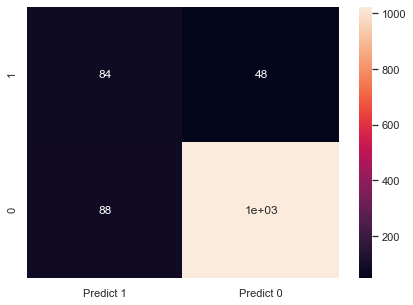

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


#Confusion Matrix
cm=sklearn.metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [ ]:
#Performance metrics in test set
model_score = model.score(x_test, y_test)
print(model_score)
print('Recall = ', sklearn.metrics.recall_score(y_test,y_predict))
print('Precision = ', sklearn.metrics.precision_score(y_test,y_predict))

0.8907630522088353
Recall =  0.6363636363636364
Precision =  0.4883720930232558


Naive Bayes is giving us an Accuracy of 89% with 63% recall and 48% precision. This is definitely poor as compared to Logistics Regression Model. Let us see if probability cut off can improve this.

In [ ]:
y_probability = model.predict_proba(x_test)[:,1]

In [ ]:
y_probability

array([9.63174700e-01, 2.23037845e-02, 2.28432456e-04, ...,
       2.17257951e-04, 9.99993447e-01, 1.74677865e-03])

In [ ]:
pd.crosstab(y_test,(y_probability > 0.25).astype(int))

col_0          0    1
LoanOnCard           
0           1006  107
1             36   96

In [ ]:
print('Accuracy= ', (1006+96)/(1006+96+107+36))
print('Recall= ', 96/(36+96))
print('Precision= ', 96/(96+107))

Accuracy=  0.885140562248996
Recall=  0.7272727272727273
Precision=  0.4729064039408867


With probability cut off at 0.25 we are getting 88% accuracy with 72% recall. However the precision is only 47%

In [ ]:
#Generating Classification report at default probability cutoff
print("Classification Report")
print(sklearn.metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.49      0.64      0.55       132
           0       0.96      0.92      0.94      1113

    accuracy                           0.89      1245
   macro avg       0.72      0.78      0.75      1245
weighted avg       0.91      0.89      0.90      1245



Among the two trained model Logistic Regression is better in all evaluation metrics that was considered

The logistic regression model that was trained using the explicit class weight (0:1 and 1:4) to handle unbalanced class distribution gave the best results. The model was selected keeping in mind the business objective of better conversion rates for borrowers. This model gave good accuracy and recall with decent precision.

Naive Bayes model also had an accuracy of 89% but the recall and precision was low as compared to the LR model. By changing the probability cut off, we were able to improve the recall but the precision went down even further. Overall LR model performed much better the NB and hence that can be considered as the final model.

The initial training data was highly unbalanced with only 10% cases that has a LoanOnCard. Highly unbalanced data effects the performance of predictive model. There are mathematical techniques such as class weights to handle unbalanced data but there is obvious limit to the improvements that can be achieved through these techniques. While creating data samples effort should be made to get sufficient examples of cases that we want our model to predict. Atleast 25-30% representation of minority class in the entire dataset can significantly improve the quality of the model.